# 3. Clustering
## After our analysis of the data we must now cluster the data accordingly
Importing approriate libraries

In [219]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

### First, we read in our data

In [42]:
index95 = pd.read_csv('data/index_95.csv')
index100 = pd.read_csv('data/index_100.csv')
index150 = pd.read_csv('data/index_150.csv')
win95 = pd.read_csv('data/wi_95.csv')
win100 = pd.read_csv('data/wi_100.csv')
win150 = pd.read_csv('data/wi_150.csv')
loss95 = pd.read_csv('data/lo_95.csv')
loss100 = pd.read_csv('data/lo_100.csv')
loss150 = pd.read_csv('data/lo_150.csv')
choice95 = pd.read_csv('data/choice_95.csv')
choice100 = pd.read_csv('data/choice_100.csv')
choice150 = pd.read_csv('data/choice_150.csv')

Cleaned data from processing

In [43]:
cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')

In [44]:
cleaned95.head()

,Margin,Most Common Choice,Study,Average Choice
Subj_1,1150,4,Fridberg,3.400000
Subj_2,-675,4,Fridberg,2.568421
Subj_3,-750,4,Fridberg,2.778947
Subj_4,-525,4,Fridberg,2.810526
Subj_5,100,4,Fridberg,3.021053


Initially, I decided to cluster based on the profit/loss margin for each subject and their most common choice. However, the most common choice would limit the clusters greatly I felt. There would only be 4 possible values (1,2,3 or 4) and this would limit what we could learn from the approriate cluster analysis. This lead me to going back to my data processing and creating the average choice column to add to my data. This was the sum of all the subjects selection divided by the number of trials and I felt this would provide better cluster analysis as a result as there would be far more variety in the range of values.

## K-Means analysis 

In [123]:
kmeans_margin_choice = KMeans(n_clusters=3).fit(cleaned95[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice.cluster_centers_

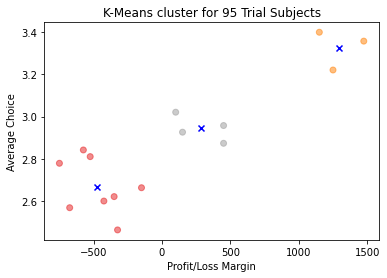

In [124]:
plt.scatter(cleaned95['Margin'], cleaned95['Average Choice'], c= kmeans_margin_choice.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 95 Trial Subjects')
plt.xlabel('Profit/Loss Margin')
plt.ylabel('Average Choice')
plt.show()

From our cluster analysis here of the 95 trial experiments, it is interesting to note in the Fridberg study the cluster which had the highest average choice also made the most money by a significant distance. K = 3 is certainly the optimal number of clusters here as they are very much pre-defined and easy to distinguish by looking at the scatter plot. We will now try to look at respective studies in a scatter plot and try to compare them with our K-means clusters to see if we can detect trends with regards to profitable studies or unprofitable studies. To do this we may need to create another column in our dataframes. We will have to number the studies accordingly with 0 being the Fridberg study and iterate through them. This way we can get some interesting comparisons between the K-means clustering and actual scatter plots.

Text(0, 0.5, 'Average Choice')

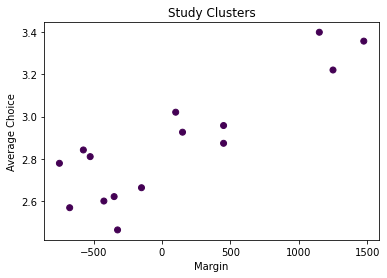

In [158]:
replacements = {
  r'Fridberg': 0
}

cleaned95['StudyNumber'] = cleaned95.Study.replace(replacements, regex=True)
plt.scatter(cleaned95['Margin'], cleaned95['Average Choice'], c=cleaned95['StudyNumber'])
plt.title("Study Clusters")
plt.xlabel('Margin')
plt.ylabel('Average Choice')

We can't tell a lot from this K-means vs Study analysis. The subjects in this dataset are all from the one Fridberg study. This leaves us to move on and check the other datasets for K-means vs study analysis.

In [170]:
kmeans_margin_choice100 = KMeans(n_clusters=3).fit(cleaned100[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice100.cluster_centers_

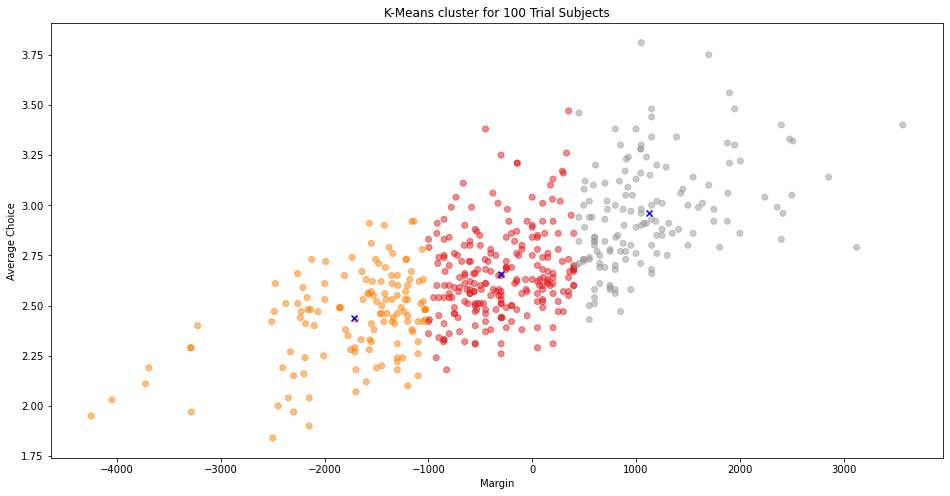

In [171]:
plt.figure(figsize=(16,8))
plt.scatter(cleaned100['Margin'], cleaned100['Average Choice'], c= kmeans_margin_choice100.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 100 Trial Subjects')
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.show()

This graph is slightly harder to tell how many clusters is ideal with far more subjects to choose from. K=3 seems a reasonable selection once again however.

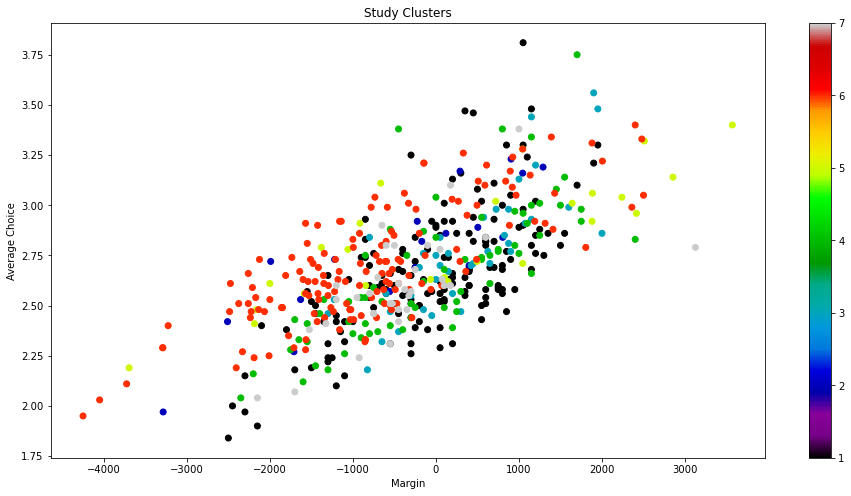

In [199]:
replacements100 = {
  r'Horstmann': 1,
  r'Kjome': 2,
  r'Maia': 3,
  r'SteingroverInPrep': 4,
  r'Premkumar': 5,
  r'Wood': 6,
  r'Worthy': 7  
}

cleaned100['StudyNumber'] = cleaned100.Study.replace(replacements100, regex=True)
plt.figure(figsize=(16,8))
plt.scatter(cleaned100['Margin'], cleaned100['Average Choice'], c=cleaned100['StudyNumber'], cmap="nipy_spectral")
plt.title("Study Clusters")
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.colorbar()

### Analysis of scatter plots for 100 trial studies
Using our colour bar we can deduce the clusters from what study they are a part of. If we look at the cluster to the left in our k-means scatter plot we can see that a substantial amount of this cluster contains subjects from the Wood et al study. It is interesting to note this had the highest mean average age of any study in the datasets. It also had a large number of participants but looking at the scatter plot very few participants made money over the course of the trials. The majority had an average choice of below 3 and certainly fell into the category of average lower choice and lower financial gain. This study also features heavily in the second cluster (the one most central) and this cluster also contains subjects who struggled to break even. The Horstmann study also features heavily in this cluster as does the Worthy study in yellow. The Worthy study leans more towards the first cluster again in the lower choice average, lower money made category. It is interesting to note that this study does not explicitly state the age demography of the group studied but tells us it was a solely female, undergraduate student study, which hints at it being a younger age group. In the third cluster to the right, which is the higher average choice, higher profit group we can see a large mix of groups with comparatively less subjects in this cluster compared to the other two. We can see a significant amount of subjects from the Maia study and also quite a few from the previously mentioned Horstmann study. We also see even with a small sample size from the study there is a significant number of Premkumar participants in this profitable cluster. Two of these studies contain a very young mean age again. The Maia study is another that focuses on undergraduate students again, but with better results than previous. 

In [167]:
kmeans_margin_choice150 = KMeans(n_clusters=3).fit(cleaned150[["Margin", "Average Choice"]])
centroids_betas = kmeans_margin_choice150.cluster_centers_

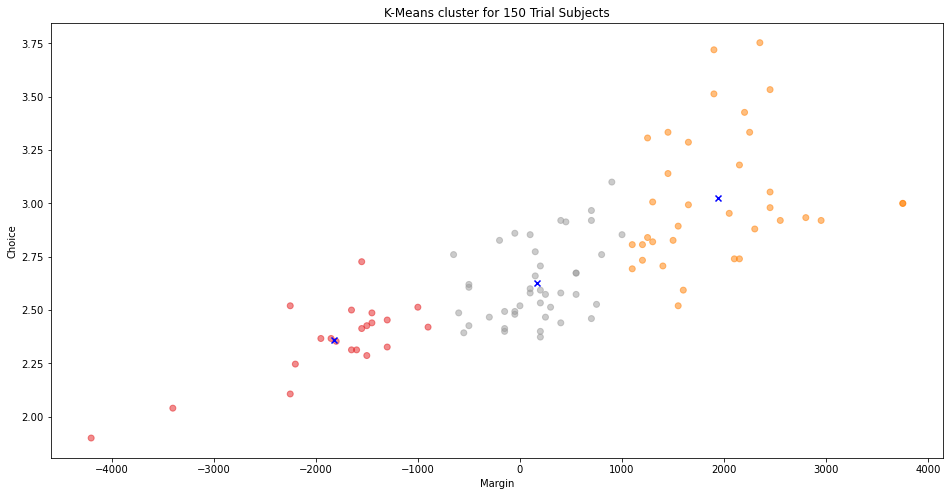

In [168]:
plt.figure(figsize=(16,8))
plt.scatter(cleaned150['Margin'], cleaned150['Average Choice'], c= kmeans_margin_choice150.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 150 Trial Subjects')
plt.xlabel('Margin')
plt.ylabel('Choice')
plt.show()

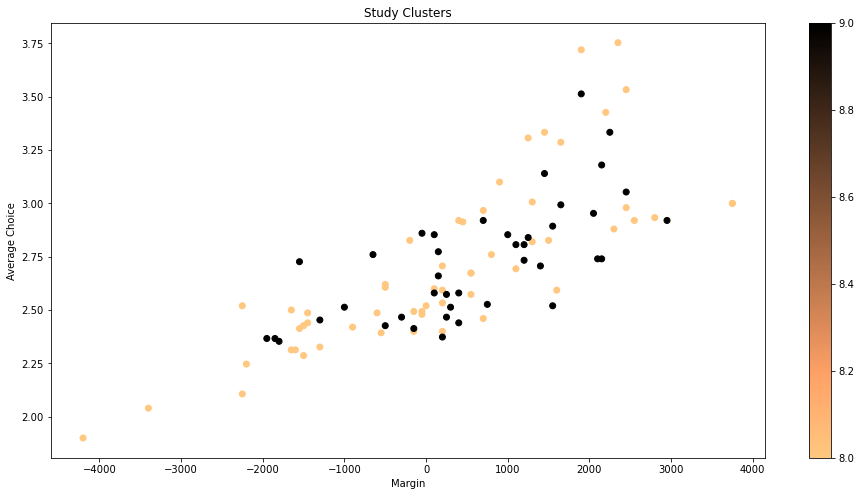

In [211]:
replacements150 = {
  r'Steingroever2011': 8,
  r'Wetzels': 9, 
}

cleaned150['StudyNumber'] = cleaned150.Study.replace(replacements150, regex=True)
plt.figure(figsize=(16,8))
plt.scatter(cleaned150['Margin'], cleaned150['Average Choice'], c=cleaned150['StudyNumber'], cmap='copper_r')
plt.title("Study Clusters")
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.colorbar()

## Elbow Method

In [94]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cleaned100[['Margin', 'Average Choice', 'Most Common Choice']])
    distortions.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


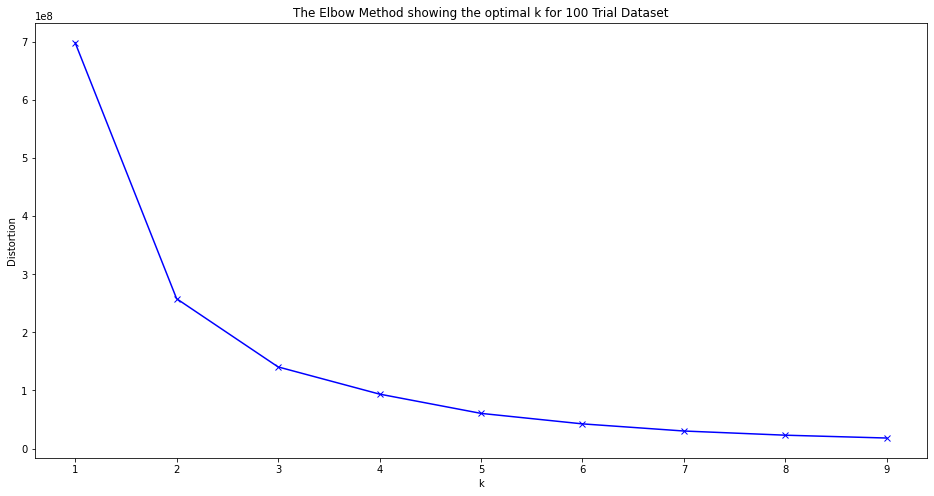

In [95]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 100 Trial Dataset')
plt.show()

From the elbow method graph above, we can see that the optimal number of clusters is K=3 for the 100 trial dataset. 

In [119]:
sse_values = []
Z = range(1,10)
for k in Z:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cleaned150[['Margin', 'Average Choice', 'Most Common Choice']])
    sse_values.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


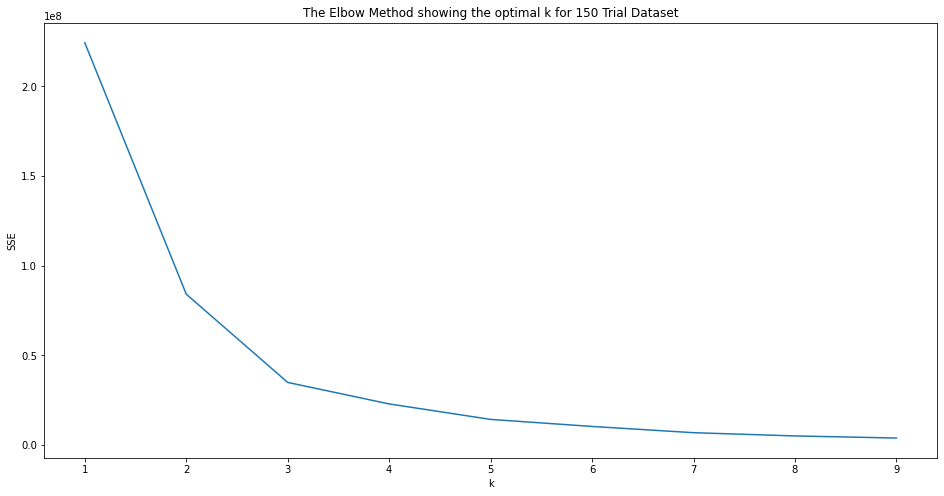

In [120]:
plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k for 150 Trial Dataset')
plt.plot(N, sse)

Again, we can see that the optimal number of clusters for our 150 trial dataset is K=3. 

## Silhouette Scores for cleaned 100 dataset

In [226]:
for n in range(2, 11):
    km = KMeans(n_clusters=n, random_state=42)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(cleaned100[['Margin', 'Average Choice', 'Most Common Choice']])
#
# Calculate Silhoutte Score
#
    score = silhouette_score(cleaned100[['Margin', 'Average Choice', 'Most Common Choice']], km.labels_, metric='euclidean')
#
# Print the score
#
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.558
Silhouetter Score: 0.532
Silhouetter Score: 0.511
Silhouetter Score: 0.535
Silhouetter Score: 0.551
Silhouetter Score: 0.550
Silhouetter Score: 0.544
Silhouetter Score: 0.544
Silhouetter Score: 0.549


## Silhouette Scores for 150 Trial Dataset

In [227]:
for n in range(2, 11):
    km = KMeans(n_clusters=n, random_state=42)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(cleaned150[['Margin', 'Average Choice', 'Most Common Choice']])
#
# Calculate Silhoutte Score
#
    score = silhouette_score(cleaned150[['Margin', 'Average Choice', 'Most Common Choice']], km.labels_, metric='euclidean')
#
# Print the score
#
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.537
Silhouetter Score: 0.605
Silhouetter Score: 0.584
Silhouetter Score: 0.602
Silhouetter Score: 0.575
Silhouetter Score: 0.591
Silhouetter Score: 0.601
Silhouetter Score: 0.602
Silhouetter Score: 0.581
